<a href="https://colab.research.google.com/github/jsnunki/bootcamp-hackspace-datafem/blob/master/Bootcamp_Sesion1_Preprocesamiento_de_los_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del caso**

Predecir o estimar el precio de una vivienda puede ser de gran ayuda a la hora  de tomar decisiones importantes tales como la adquisición de casa propia . A continuación se presenta un dataset compuesto por **25, 660 registros** para **Argentina y Colombia** adjunto a las siguientes **10 variables**:

    1.   pais : "Argentina", "Colombia"
    2.   provincia_departamento: Provincia o departamento (no ambas)  donde se ubica el departamento
    3.   ciudad: Ciudad donde se ubica el departamento
    4.   property_type: "Departamento", "Apartamento"
    5.   operation_type: "Venta", "Alquiler"
    6.   rooms: cantidad de espacios en general dentro del apartamento
    7.   bedrooms: cantidad de cuartos donde dormir dentro del apartamento
    8.   bathrooms: cantidad de baños dentro del apartamento
    9.   surface_total: área total en metros cuadrados del departamento
    10.  currency: USD (dólar americano)

![Image of Yaktocat](https://www.datasource.ai/uploads/7c2c64c37b855715637538ef4f19a46d.png)

# **Lectura de los datos**

In [ ]:
import pandas as pd
import numpy as np
tipo_datos={'rooms': 'int', 'bedrooms': 'int', 'bathrooms': 'int', 'surface_total': 'int', 'price': 'int'}
data=pd.read_csv("https://raw.githubusercontent.com/javalpe/datasets/master/234f7576969252b72e52fa4a4027fabd.csv", encoding='latin', index_col='Id', dtype=tipo_datos)
data 

,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
Id,,,,,,,,,,,
0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2,1,1,37,USD,85000
1,Argentina,Capital Federal,Palermo,Departamento,Venta,6,4,4,300,USD,1590000
2,Colombia,AtlÃ¡ntico,Barranquilla,Apartamento,Venta,3,3,3,95,USD,85329
3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3,3,1,60,USD,22846
4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3,2,1,45,USD,80000
...,...,...,...,...,...,...,...,...,...,...,...
25655,Colombia,Antioquia,Bello,Apartamento,Venta,3,3,2,61,USD,41288
25656,Argentina,Capital Federal,Caballito,Departamento,Venta,2,1,1,40,USD,85000
25657,Argentina,Capital Federal,Villa del Parque,Departamento,Venta,2,1,1,61,USD,185700


In [ ]:
data.drop('currency', axis=1)

,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,price
Id,,,,,,,,,,
0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2,1,1,37,85000
1,Argentina,Capital Federal,Palermo,Departamento,Venta,6,4,4,300,1590000
2,Colombia,AtlÃ¡ntico,Barranquilla,Apartamento,Venta,3,3,3,95,85329
3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3,3,1,60,22846
4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3,2,1,45,80000
...,...,...,...,...,...,...,...,...,...,...
25655,Colombia,Antioquia,Bello,Apartamento,Venta,3,3,2,61,41288
25656,Argentina,Capital Federal,Caballito,Departamento,Venta,2,1,1,40,85000
25657,Argentina,Capital Federal,Villa del Parque,Departamento,Venta,2,1,1,61,185700


In [ ]:
data.drop('currency', axis=1)  # .drop tiene los parametros axis=1 para borrar columnas, axis=0 para borrar filas

,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,price
Id,,,,,,,,,,
0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2,1,1,37,85000
1,Argentina,Capital Federal,Palermo,Departamento,Venta,6,4,4,300,1590000
2,Colombia,AtlÃ¡ntico,Barranquilla,Apartamento,Venta,3,3,3,95,85329
3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3,3,1,60,22846
4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3,2,1,45,80000
...,...,...,...,...,...,...,...,...,...,...
25655,Colombia,Antioquia,Bello,Apartamento,Venta,3,3,2,61,41288
25656,Argentina,Capital Federal,Caballito,Departamento,Venta,2,1,1,40,85000
25657,Argentina,Capital Federal,Villa del Parque,Departamento,Venta,2,1,1,61,185700


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

In [ ]:
data.drop('operation_type', axis=1)

# **Preprocesamiento de los datos**

## I. *Verificación de datos perdidos*

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


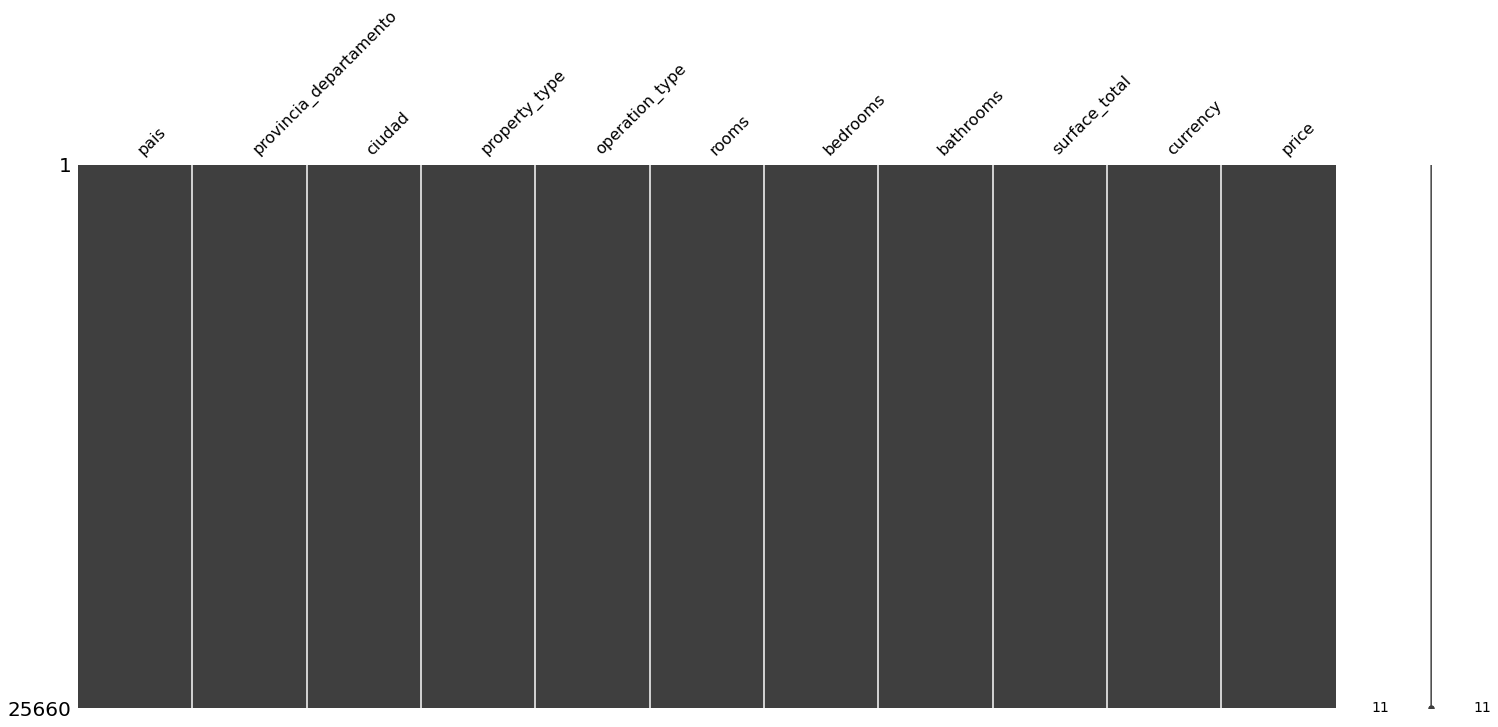

In [ ]:
import missingno as ms
ms.matrix(data)

In [ ]:
for col in data.columns:
  print('En la columna',col,'hay',data[col].isna().sum(),'valores nulos')

En la columna pais hay 0 valores nulos
En la columna provincia_departamento hay 0 valores nulos
En la columna ciudad hay 0 valores nulos
En la columna property_type hay 0 valores nulos
En la columna operation_type hay 0 valores nulos
En la columna rooms hay 0 valores nulos
En la columna bedrooms hay 0 valores nulos
En la columna bathrooms hay 0 valores nulos
En la columna surface_total hay 0 valores nulos
En la columna currency hay 0 valores nulos
En la columna price hay 0 valores nulos


In [ ]:
for col in data.columns:
  print('En la columna',col,'hay',data[col].isna().sum()/data[col].shape[0],'valores nulos')

En la columna pais hay 0.0 valores nulos
En la columna provincia_departamento hay 0.0 valores nulos
En la columna ciudad hay 0.0 valores nulos
En la columna property_type hay 0.0 valores nulos
En la columna operation_type hay 0.0 valores nulos
En la columna rooms hay 0.0 valores nulos
En la columna bedrooms hay 0.0 valores nulos
En la columna bathrooms hay 0.0 valores nulos
En la columna surface_total hay 0.0 valores nulos
En la columna currency hay 0.0 valores nulos
En la columna price hay 0.0 valores nulos


## II. *Verificación de outliers*

Para el presente caso, la variable más susceptible a error de valores muy por encima del promedio es la **columna precio**

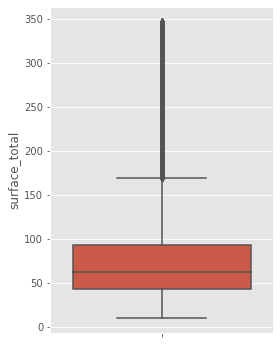

In [ ]:
"Se recomienda el uso del método boxplot de la librería seaborn (sns) para una rápida verificación de los outliers"
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(4,6))
sns.boxplot(data['surface_total'], orient='v')
plt.show()

Como se ha hecho evidente existen outliers en la columna precio, así que proceda a **reemplazarlos por el percentil 95**

In [ ]:
outliers = data[data['surface_total'] > data['surface_total'].quantile(.95)].index
data.loc[outliers,'surface_total'] = data['surface_total'].quantile(.95)

## III. *Feature Engineering*

Sería interesante calcular para **todos los registros** el área por cada baño, cuarto y habitación. Para ello tome las siguientes aproximaciones:

      1. Área de un baño = 12,5% del área total
      2. Área de un cuarto = 15% del área total
      3. Área de una habitación = 20% del área total   



**Crear la función** necesaria para calcular las áreas por cada registro y **añadir** los resultados como **nuevas columnas** de data

In [46]:
def area_bathroom (a, b): 
    return (0.125*b)/a

In [42]:
data['area_bathroom'] = data.apply(lambda row : area_bathroom(row['bathrooms'],row['surface_total']), axis = 1)

In [51]:
def area_bedrooms (a, b): 
    return (0.2*b)/a
data['area_bedrooms'] = data.apply(lambda row : area_bedrooms(row['bedrooms'],row['surface_total']), axis = 1)   


In [52]:
def area_rooms (a, b): 
    return (0.1*b)/a
    
data['area_rooms'] = data.apply(lambda row : area_rooms(row['rooms'],row['surface_total']), axis = 1)   



In [53]:
data

,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price,area_bathroom,area_bedrooms,area_rooms
Id,,,,,,,,,,,,,,
0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2,1,1,37.0,USD,85000,4.625000,7.400000,1.850000
1,Argentina,Capital Federal,Palermo,Departamento,Venta,6,4,4,194.0,USD,1590000,6.062500,9.700000,3.233333
2,Colombia,AtlÃ¡ntico,Barranquilla,Apartamento,Venta,3,3,3,95.0,USD,85329,3.958333,6.333333,3.166667
3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3,3,1,60.0,USD,22846,7.500000,4.000000,2.000000
4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3,2,1,45.0,USD,80000,5.625000,4.500000,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,Colombia,Antioquia,Bello,Apartamento,Venta,3,3,2,61.0,USD,41288,3.812500,4.066667,2.033333
25656,Argentina,Capital Federal,Caballito,Departamento,Venta,2,1,1,40.0,USD,85000,5.000000,8.000000,2.000000
25657,Argentina,Capital Federal,Villa del Parque,Departamento,Venta,2,1,1,61.0,USD,185700,7.625000,12.200000,3.050000


Se ha procedido a comparar el **precio promedio** de cada **departamento_provincia** dando como resultado un indicador **entero**:

In [54]:
externa=pd.read_csv("https://raw.githubusercontent.com/javalpe/datasets/master/merge.csv",encoding='latin',sep=";")

Actualizamos data incluyendo una **nueva columna** al final

In [55]:
data=data.merge(externa, left_on='provincia_departamento', right_on='provincia_departamento')